## Classification task on IRIS Dataset using the Naive Bayes Algorithm

references : 

 - https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
 - https://en.wikipedia.org/wiki/Iris_flower_data_set
 - https://www.cs.rpi.edu/~zaki/DMML/slides/pdf/ychap18.pdf


The Bayes classifier estimates the posterior probability P(ci |x) for each class ci ,
and chooses the class that has the largest probability.

In [1]:
#importing the relevant libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 


import math
import scipy 

warnings.filterwarnings("ignore")
sns.set()



In [2]:
#importing the dataset from sklearn's datasets
from sklearn import datasets
iris = datasets.load_iris()


In [3]:
# the type of flowers that are present in the dataset

iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
## Basic description of the iris dataset

print(iris['DESCR'])


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
#creating a dataframe for the iris dataset
df = pd.DataFrame(iris['data'],columns = ['sepal_length','sepal_width','petal_length','petal_width'])

In [6]:
#adding the target vals to the dataframe

df['target'] = iris['target']
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### Creating a pairplot of the dataset to get an idea on the type of data we have

In [7]:
# create a copy dataframe of the original for visualization
df1 = df.copy()

#we'll replace the values of the target with the name of flower for help in visualizaton
df1['species'] = df1['target'].replace([0,1,2],iris['target_names'].tolist())
df1 = df1.drop(['target'],axis = 1)
df1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


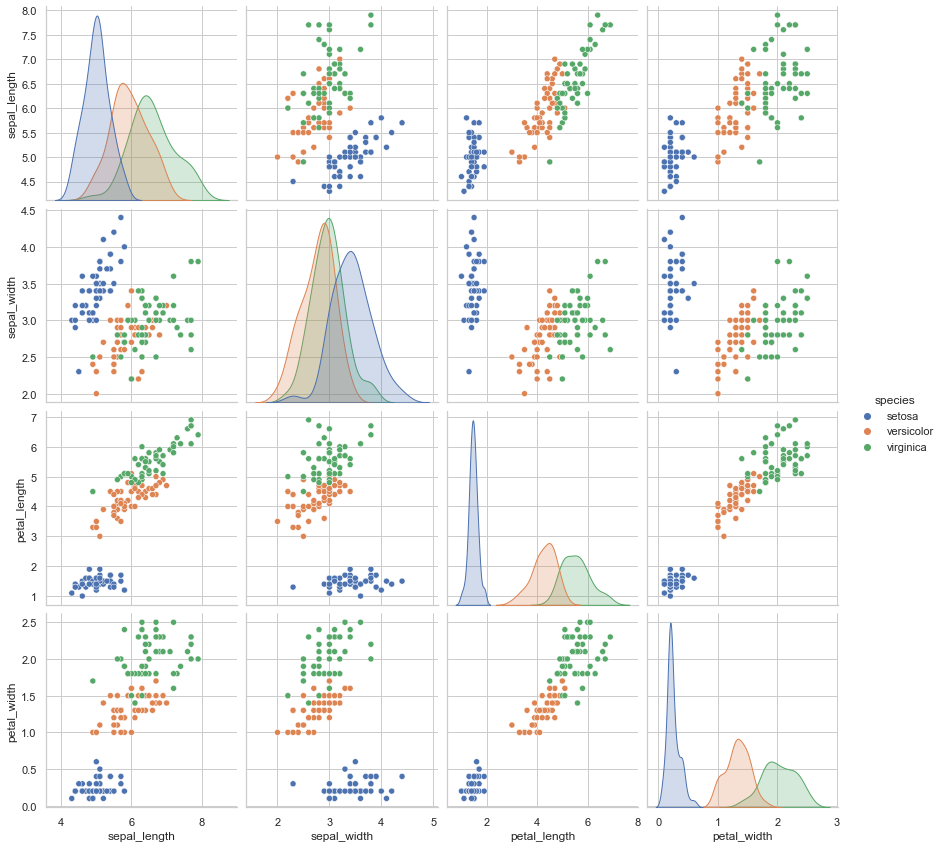

In [8]:


# creating a pair plot for better representation of the features

sns.set_style("whitegrid");
sns.pairplot(df1, hue="species", height= 3);
plt.show()

#### Test train split


 splitting the dataset with 40 samples for each category in the training data & 10 for each category in the testing data

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
#Separating the features and the target values from the IRIS dataset dataframe
X=df.iloc[:,0:4].values
y=df.iloc[:,4].values

In [11]:
#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1,stratify =y)


print("No of Values in training data:",X_train.shape[0])
print("No of features in training data:",X_train.shape[1])
print("No of Values in testing data:",X_test.shape[0])
print("No of features in testing data:",X_test.shape[1])


No of Values in training data: 120
No of features in training data: 4
No of Values in testing data: 30
No of features in testing data: 4


In [12]:
## Confirm that there are 40 samples of each type in the train data & 10 in test data 

In [13]:
import collections

vals_train = collections.Counter(y_train)
print("No of samples of each type in train data")
for key, value in vals_train.items():
    print(f"{key}: {value}")


vals_test = collections.Counter(y_test)
print("\nNo of samples of each type in test data")
for key, value in vals_test.items():
    print(f"{key}: {value}")
    


No of samples of each type in train data
0: 40
2: 40
1: 40

No of samples of each type in test data
2: 10
0: 10
1: 10


#### Segregating the training data based on the classes

In [14]:
c0 = []; c1 = [] ;c2 = []


for i in range(0,len(y_train)):
    if y_train[i] == 0:
        c0.append(X_train[i])
    elif y_train[i] == 1:
        c1.append(X_train[i])
    elif y_train[i] == 2:
        c2.append(X_train[i])

### Calculating the likelihood

First we'll segregate features based on their specific class
To calculate the likelihood for any feature , we'll need to have the mean and standard deviation of that feature

The feature values are:

- 0 =  sepal length
- 1 =  sepal width
- 2 =  petal length
- 3 =  petal width

The three classes are :

- 0 = setosa
- 1 = versicolor
- 2 = virginica

In [16]:
## We aleready have the separate arrays for each class, with 40 samples each i.e c0,c1 & c2
### creating the features matrix for specific classes
def likelihood(array,feature,feature_val):
    
    mean = np.mean([array[i][feature] for i in range(0,len(array))]) # calculate the mean of a feature for specific class
    std_dev = np.std([array[i][feature] for i in range(0,len(array))]) # calculate the mean of a feature for specific class
    
    ## Calculate the likelihood for the specific feature value using the Gaussian distribution
    likelihood = scipy.stats.norm.pdf(feature_val, mean, std_dev)
    
    return likelihood
    


In [17]:
# Testing it on a sample belonging to setosa & for feature sepal length , calculating likelihood for sepal length = 4.5

likelihood(c0,0,4.5)


0.41106379045590447

### Calculating the Priori

In [18]:
def priori(class_array):
    
    priori = len(class_array)/(X_train.shape[0])
    
    return priori

In [19]:
# Calculating the priori


#for class 0 - setosa
P_c0 = priori(c0)
print("P(C0) :",P_c0)

#for class 1 -
P_c1 = priori(c1)
print("P(C1) :",P_c1)

#for class 2 -
P_c2 = priori(c2)
print("P(C2) :",P_c2)

P(C0) : 0.3333333333333333
P(C1) : 0.3333333333333333
P(C2) : 0.3333333333333333


Here, we can see that all the classes have eqal no of samples, as we have the balanced dataset the priori values are same for each class

#### Calculating the posterior

In [20]:
def mean_matrix(array):
    
    mean_m = [np.mean([array[i][0] for i in range(0,len(array))]),
              np.mean([array[i][1] for i in range(0,len(array))]),
              np.mean([array[i][2] for i in range(0,len(array))]),
              np.mean([array[i][3] for i in range(0,len(array))])]
    
    mean_mat = np.array(mean_m).reshape(-1,1)
    
    return mean_mat


In [22]:
def cov_matrix(array):
    
    cov_m = np.diag(np.diag(np.cov([[array[i][0] for i in range(0,len(array))],
                   [array[i][1] for i in range(0,len(array))],
                   [array[i][2] for i in range(0,len(array))],
                   [array[i][3] for i in range(0,len(array))]])))
    
    return cov_m

In [24]:
# lk = 1/(np.sqrt(((2*math.pi)**3) * (np.linalg.det(sigc0))))* np.exp(-1/2 *(np.dot(np.transpose(X - uc0), np.dot((np.linalg.inv(sigc0)),(X-uc0)))).item()) 


In [25]:
def likelihood(sample,class_type):
    
    mean_mat = mean_matrix(class_type)
    sig_mat = cov_matrix(class_type)
    
    lk_val = 1/(np.sqrt(((2*math.pi)**3) * (np.linalg.det(sig_mat))))* np.exp(-1/2 *(np.dot(np.transpose(sample - mean_mat), np.dot((np.linalg.inv(sig_mat)),(sample-mean_mat)))).item()) 

    
    return lk_val
    

In [26]:
# likelihood(X,c0)

In [27]:
def classifier_NB(sample_data):
    y_pred =[]
    
    for data in X_test:

        Post_c0 = priori(c0) * likelihood(data.reshape(-1,1),c0)
        Post_c1 = priori(c1) * likelihood(data.reshape(-1,1),c1)
        Post_c2 = priori(c2) * likelihood(data.reshape(-1,1),c2)


        pred = np.argmax([Post_c0,Post_c1,Post_c2])

        y_pred.append(pred)
    
    pred_array = np.array(y_pred)
    return pred_array
    
    
    
    

In [28]:
y_pred = classifier_NB(X_test)
y_pred

array([2, 0, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1], dtype=int64)

In [29]:
y_test

array([2, 0, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 1,
       0, 0, 2, 2, 0, 0, 1, 1])

#### Calculating the Accuracy

In [30]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

print(f"The prediction accuracy for our Naive Bayes Classifier is : {np.round((accuracy_score(y_test, y_pred) * 100),2)} %")

The prediction accuracy for our Naive Bayes Classifier is : 96.67 %
